# Random Forest Feature Detection

## Setup 

First we need our tools. pandas gives us the DataFrame, very similar 
to R's DataFrames. The DataFrame is a structure that allows us to
work with our data more easily. It has nice features for slicing 
and transformation of data, and easy ways to do basic statistics. 

numpy has some very handy functions that work on DataFrames.

## Dataset

We are using a dataset about the wine quality dataset, archived at UCI's Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php).

In [1]:
import pandas as pd
import numpy as np

Now we'll load our data. pandas makes it easy!

In [2]:
# red wine quality data, packed in a DataFrame
red_df = pd.read_csv('winequality-red.csv',sep=';',header=0, index_col=False) 

# white wine quality data, packed in a DataFrame
white_df = pd.read_csv('winequality-white.csv',sep=';',header=0,index_col=False) 

# rose? other fruit wines? plum wine? :(

Like in R, there is a .describe() method that gives basic statistics for every column in the dataset.

In [3]:
# for red wines
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# for white wines 
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Sometimes it is easier to understand the data visually. A histogram of 
the white wine quality *data citric* acid samples is shown below. You 
can of course visualize other columns' data or other datasets. Just 
replace the DataFrame and column name below.

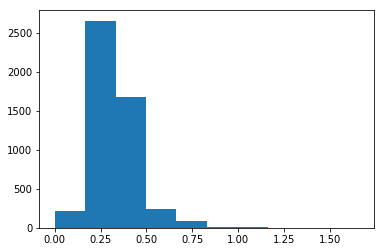

In [5]:
import matplotlib.pyplot as plt

def extract_col(df,col_name):
    return list(df[col_name])

col = extract_col(white_df,'citric acid') # can replace with another dataframe or column
plt.hist(col)

#TODO: add axes and such to set a good example

plt.show()

## Detecting Features

Let us try out a some elementary machine learning models. These models 
are not always for prediction. They are also useful to find what 
features are most predictive of a variable of interest. Depending 
on the classifier you use, you may need to transform the data 
pertaining to that variable.

### Data Preparation

Let us assume we want to study what features are most correlated 
with pH. pH of course is real-valued, and continuous. The classifiers 
we want to use usually need labeled or integer data. Hence, we will 
transform the pH data, assigning wines with pH higher than average 
as ``hi`` (more basic or alkaline) and wines with pH lower than 
average as ``lo`` (more acidic). 

In [3]:
# refresh to make Jupyter happy
red_df = pd.read_csv('winequality-red.csv',sep=';',header=0, index_col=False) 
white_df = pd.read_csv('winequality-white.csv',sep=';',header=0,index_col=False) 

#TODO: data cleansing functions here, e.g. replacement of NaN

# if the variable you want to predict is continuous, you can map ranges of values
# to integer/binary/string labels

# for example, map the pH data to 'hi' and 'lo' if a pH value is more than or
# less than the mean pH, respectively
M = np.mean(list(red_df['pH'])) # expect inelegant code in these mappings
Lf = lambda p: int(p < M)*'lo' + int(p >= M)*'hi' # some C-style hackery 

# create the new classifiable variable
red_df['pH-hi-lo'] = map(Lf,list(red_df['pH']))

# and remove the predecessor
del red_df['pH']

Now we specify which dataset and variable you want to predict by 
assigning vlues to ``SELECTED_DF`` and ``TARGET_VAR``, respectively. 

We like to keep a parameter file where we specify data sources 
and such. This lets me create generic analytics code that is easy 
to reuse. 

After we have specified what dataset we want to study, we split 
the training and test datasets. We then scale (normalize) the data, 
which makes most classifiers run better. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# make selections here without digging in code
SELECTED_DF = red_df # selected dataset
TARGET_VAR = 'pH-hi-lo' # the predicted variable

# generate nameless data structures
df = SELECTED_DF
target = np.array(df[TARGET_VAR]).ravel()
del df[TARGET_VAR] # no cheating

#TODO: data cleansing function calls here

# split datasets for training and testing
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2)

# set up the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# apply the scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now we pick a classifier. As you can see, there are many to try 
out, and even more in scikit-learn's documentation and many 
examples and tutorials. Random Forests are data science workhorses. 
They are the go-to method for most data scientists. Be careful 
relying on them though--they tend to overfit. We try to avoid 
overfitting by separating the training and test datasets. 

## Random Forest

In [6]:
# pick a classifier

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,ExtraTreeClassifier,ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

clf = RandomForestClassifier()

Now we will test it out with the default parameters.

Note that this code is boilerplate. You can use it interchangeably for most scikit-learn models. 

In [10]:
# test it out

model = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test,pred)

var_score = clf.score(X_test,y_test)

# the results
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

Now output the results. For Random Forests, we get a feature ranking. 
Relative importances usually exponentially decay. The first few 
highly-ranked features are usually the most important. 

In [11]:
# for the sake of clarity
num_features = X_train.shape[1]
features = map(lambda x: df.columns[x],indices)
feature_importances = map(lambda x: importances[x],indices)

print 'Feature ranking:\n'

for i in range(num_features):
    feature_name = features[i]
    feature_importance = feature_importances[i]
    print '%s%f' % (feature_name.ljust(30), feature_importance)

Feature ranking:

fixed acidity                 0.269778
citric acid                   0.171337
density                       0.089660
volatile acidity              0.088965
chlorides                     0.082945
alcohol                       0.080437
total sulfur dioxide          0.067832
sulphates                     0.047786
free sulfur dioxide           0.042727
residual sugar                0.037459
quality                       0.021075


Sometimes it's easier to visualize. We'll use a bar chart. 

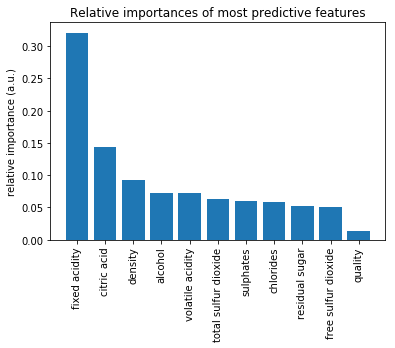

In [11]:
plt.clf()
plt.bar(range(num_features),feature_importances)
plt.xticks(range(num_features),features,rotation=90)
plt.ylabel('relative importance (a.u.)')
plt.title('Relative importances of most predictive features')
plt.show()

In [13]:
import dask.dataframe as dd

red_df = dd.read_csv('winequality-red.csv',sep=';',header=0) 
white_df = dd.read_csv('winequality-white.csv',sep=';',header=0) 

## Acknowledgement

This notebook was developed by Juliette Zerick and Gregor von Laszewski